## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np

In [2]:
a = [0,1]
a = np.array(a)
def generate_vandermonde(array):
    return array.reshape((-1,1))**range(len(a) - 1, -1, -1)
print(generate_vandermonde(a))
print(np.vander(a))

[[0 1]
 [1 1]]
[[0 1]
 [1 1]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [3]:
import random
from matplotlib import pyplot as plt

In [4]:
def random_results(n):
    return np.concatenate( (
                           np.random.exponential(scale = 1,size=(n,10000)),
                           np.random.normal(loc = 1, scale = 1,size=(n,10000)),
                           np.random.poisson(lam = 1, size = (n,10000)),
                           np.random.binomial(n=1, p= 0.5, size = (n,10000)) * 2)
                          ,axis = 1).reshape((10000,n,4), order = 'F')
n = 6
matr = np.array(random_results(n))
print(matr)


[[[ 1.20019166  0.80588289  2.          2.        ]
  [ 0.53086965  1.21023857  2.          2.        ]
  [ 0.61157955  2.4977455   1.          0.        ]
  [ 1.22665285  1.8634227   0.          2.        ]
  [ 0.76375584  2.7432085   0.          2.        ]
  [ 1.23431014  0.61831784  1.          2.        ]]

 [[ 0.33283804 -0.1356671   1.          0.        ]
  [ 1.37095131  1.10437544  1.          0.        ]
  [ 0.48824703  0.39421002  1.          2.        ]
  [ 1.31182001  2.0312465   1.          2.        ]
  [ 3.1834217  -0.28993952  2.          2.        ]
  [ 1.02646619  2.33153101  0.          2.        ]]

 [[ 0.19813251  1.57520416  0.          0.        ]
  [ 2.40532512 -0.86705081  0.          0.        ]
  [ 0.30282071  1.72590708  0.          2.        ]
  [ 0.65476027  3.43310968  1.          2.        ]
  [ 3.92333395  0.62946536  0.          2.        ]
  [ 0.10429108  1.43544459  0.          0.        ]]

 ...

 [[ 0.46541426  1.12744048  0.          2.        ]


In [5]:
results_sum = np.sum(matr, axis = 1)
results_sum

array([[ 5.56735969,  9.738816  ,  6.        , 10.        ],
       [ 7.71374428,  5.43575635,  6.        ,  8.        ],
       [ 7.58866364,  7.93208007,  1.        ,  6.        ],
       ...,
       [ 6.62419735,  5.86063621,  4.        ,  8.        ],
       [ 3.98528227,  3.52854437,  2.        ,  8.        ],
       [ 9.52322822,  9.10828522,  5.        , 10.        ]])

In [6]:
winners = results_sum.argmax(axis = 1)
winners = np.unique(winners, return_counts=True)
winners
labels = ['Винни-Пух', 'Пятачок', 'Кролик','Иа-Иа']

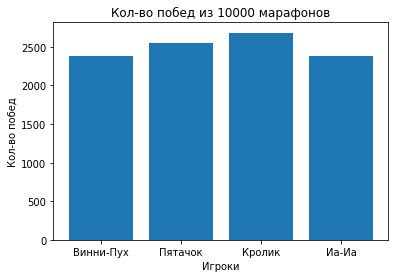

In [7]:
fig, ax = plt.subplots()
ax.bar(labels, winners[1].tolist())
plt.title('Кол-во побед из 10000 марафонов')
plt.xlabel('Игроки')
plt.ylabel('Кол-во побед')
plt.show()

Результаты примерно одинаковы на выборке из 10000 марафонов

In [8]:
def random_results_teams(n):
    return np.concatenate( (
                           np.random.exponential(scale = 1,size=(n,10000))+
                           np.random.normal(loc = 1, scale = 1,size=(n,10000)),
                           np.random.poisson(lam = 1, size = (n,10000)) +
                           np.random.binomial(n=1, p= 0.5, size = (n,10000)) * 2
                            )
                          ,axis = 1).reshape((10000,n,2), order = 'F')
matr = np.array(random_results_teams(n))
print(matr)

[[[ 4.27088949  0.        ]
  [ 0.2844576   2.        ]
  [ 8.20176477  2.        ]
  [ 1.53164703  0.        ]
  [ 4.41217533  1.        ]
  [ 2.4720675   4.        ]]

 [[ 2.43881797  1.        ]
  [ 1.60094001  0.        ]
  [ 4.89044811  2.        ]
  [ 2.67816208  4.        ]
  [ 1.42926827  5.        ]
  [ 1.72363973  1.        ]]

 [[ 3.1617513   3.        ]
  [ 2.64804769  3.        ]
  [ 0.69229794  1.        ]
  [ 0.37895489  0.        ]
  [ 3.44741831  1.        ]
  [ 4.62237384  0.        ]]

 ...

 [[ 1.88213062  3.        ]
  [-0.13470543  3.        ]
  [ 2.85135842  3.        ]
  [ 1.56796495  0.        ]
  [ 2.91879525  0.        ]
  [ 0.41628477  3.        ]]

 [[ 1.86328054  2.        ]
  [ 2.56171922  1.        ]
  [ 0.74856832  0.        ]
  [ 2.26459031  3.        ]
  [ 3.3213138   2.        ]
  [ 0.72967755  0.        ]]

 [[ 1.28375388  1.        ]
  [ 3.14758578  3.        ]
  [ 2.24890173  0.        ]
  [-1.34198168  0.        ]
  [ 3.44177751  4.        ]
  [ 

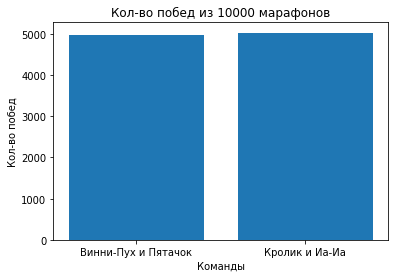

In [9]:
results_sum = np.sum(matr, axis = 1)
winners = results_sum.argmax(axis = 1)
winners = np.unique(winners, return_counts=True)
fig, ax = plt.subplots()
ax.bar(['Винни-Пух и Пятачок', 'Кролик и Иа-Иа'], winners[1].tolist())
plt.title('Кол-во побед из 10000 марафонов')
plt.xlabel('Команды')
plt.ylabel('Кол-во побед')
plt.show()

Результаты логичны, потому что мы объединили команды, а соответственно и сложили вероятности

# 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [10]:
import requests as rq
from lxml import html
import pandas as pd

In [11]:
def parse_page(search, page):
    results = []
    header = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 YaBrowser/20.3.2.238 Yowser/2.5 Yptp/1.23 Safari/537.36'
    }
    site = 'https://www.avito.ru/moskva'
    params = {
    'q': search,
    'p' : page
    }

    response = rq.get(site, headers = header, params = params).text
    root = html.fromstring(response)
    items = root.xpath('//div[contains(@class, "item__line")]')
    for item in items:
        info = {}
        info['title'] = item.xpath('.//a[contains(@class, "snippet-link")]/text()')[0]
        info['link'] = 'https://www.avito.ru' + item.xpath('.//a[contains(@class, "snippet-link")]/@href')[0]
        info['price'] = parse_price(item.xpath('.//span[contains(@class, "snippet-price")]/text()')[0])
        info['metro'] = None
        info['dist_from_metro'] = None
        metro = item.xpath('.//span[@class = "item-address-georeferences-item__content"]/text()')
        distance = item.xpath('.//span[@class = "item-address-georeferences-item__after"]/text()')
        if metro:
            info['metro'] = metro[0]
        if distance:
            distance = parse_distance(distance[0].replace(u'\xa0',u' '))
            info['dist_from_metro'] = distance
        results.append(info)
    return pd.DataFrame(results)
def parse_distance(distance):
    if distance is None:
        return None
    distance = distance[1:]
    distance = distance.replace(',', '.')
    splited = distance.split()
    a = float(splited[0])
    if 'км' in distance:
        a *= 1000
    return a
def parse_price(price):
    if 'Цена' in price or 'Бесплатно' in price:
        return price[2:]
    return price[2:-3]
def add_result_to_dataframe(result, data):
    data = data.append(result, ignore_index=True)
parse_page('сумка', 3)

,title,link,price,metro,dist_from_metro
0,Сумочка Louis Vuitton,https://www.avito.ru/moskva/odezhda_obuv_akses...,110 000 ₽,Молодежная,NaN
1,Сумка bottega veneta Medium Olimpia оригинал,https://www.avito.ru/moskva/odezhda_obuv_akses...,68 000 ₽,Международная,100.0
2,"Сумка Prada, оригинал. Абсолютно новая",https://www.avito.ru/moskva/odezhda_obuv_akses...,60 000 ₽,Киевская,900.0
3,Сумка,https://www.avito.ru/moskva/odezhda_obuv_akses...,700 ₽,Китай-город,500.0
4,Сумка,https://www.avito.ru/moskva/tovary_dlya_kompyu...,Бесплатно,Солнцево,900.0
5,Сумка,https://www.avito.ru/moskva/odezhda_obuv_akses...,3 000 ₽,Савеловская,100.0
6,Сумка Coccinelle,https://www.avito.ru/moskva/odezhda_obuv_akses...,4 000 ₽,Орехово,100.0
7,Сумка Kenzo,https://www.avito.ru/moskva/odezhda_obuv_akses...,4 500 ₽,Домодедовская,NaN
8,Мужская кожаная сумка -black- new мужские сумки,https://www.avito.ru/moskva/odezhda_obuv_akses...,1 399 ₽,Царицыно,100.0
9,Сумка,https://www.avito.ru/moskva/odezhda_obuv_akses...,3 490 ₽,Свиблово,1200.0


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [12]:
data = pd.read_csv('walmart.csv')

Первые 5 наблюдений

In [13]:
data.head(5)

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


Последние 5 наблюдений

In [14]:
data.tail(5)

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


Типы данных

In [15]:
data.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

Кол-во переменных

In [16]:
len(data.columns)

16

Кол-во наблюдений

In [17]:
len(data.index)

418239

Приводим столбец с датой к нужному типу данных

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

Процент неопределенных значений в каждой колонке

In [19]:
null_values_more_than_60_percent = []
for col in data.columns:
    procent = round(data[col].isnull().sum() / len(data.index) * 100, 2)
    if procent > 60:
        null_values_more_than_60_percent.append(col)
    print(col, procent, '%')

Store 0.0 %
Date 0.0 %
Dept 0.0 %
Weekly_Sales 0.0 %
IsHoliday 0.0 %
Type 0.0 %
Size 0.0 %
Temperature 0.0 %
Fuel_Price 0.0 %
MarkDown1 64.74 %
MarkDown2 74.14 %
MarkDown3 67.83 %
MarkDown4 68.36 %
MarkDown5 64.57 %
CPI 0.0 %
Unemployment 0.0 %


Удаляем те, в которых доля пропущенных значений больше 60%

In [20]:
data

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [21]:
data.drop(null_values_more_than_60_percent, inplace = True, axis = 1)
data

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


Кол-во магазинов в выборке

In [22]:
len(data['Store'].unique())

45

Кол-во отделений в выборке

In [23]:
len(data['Dept'].unique())

81

Период исследований

In [24]:
print('c', data['Date'].min(), 'до', data['Date'].max())

c 2010-02-05 00:00:00 до 2012-10-19 00:00:00


Динамика продаж

In [25]:

data_copy = pd.concat([data['Date'], data['Weekly_Sales']], axis = 1)
data_copy = data_copy.groupby('Date').sum()
data_copy = data_copy.reset_index()
data_copy.sort_values(by = 'Date', inplace = True)
data_copy

,Date,Weekly_Sales
0,2010-02-05,49750737.50
1,2010-02-12,48336670.90
2,2010-02-19,48276983.78
3,2010-02-26,43968565.13
4,2010-03-05,46871469.30
...,...,...
137,2012-09-21,44354547.19
138,2012-09-28,43734749.40
139,2012-10-05,47566865.36
140,2012-10-12,46126816.83


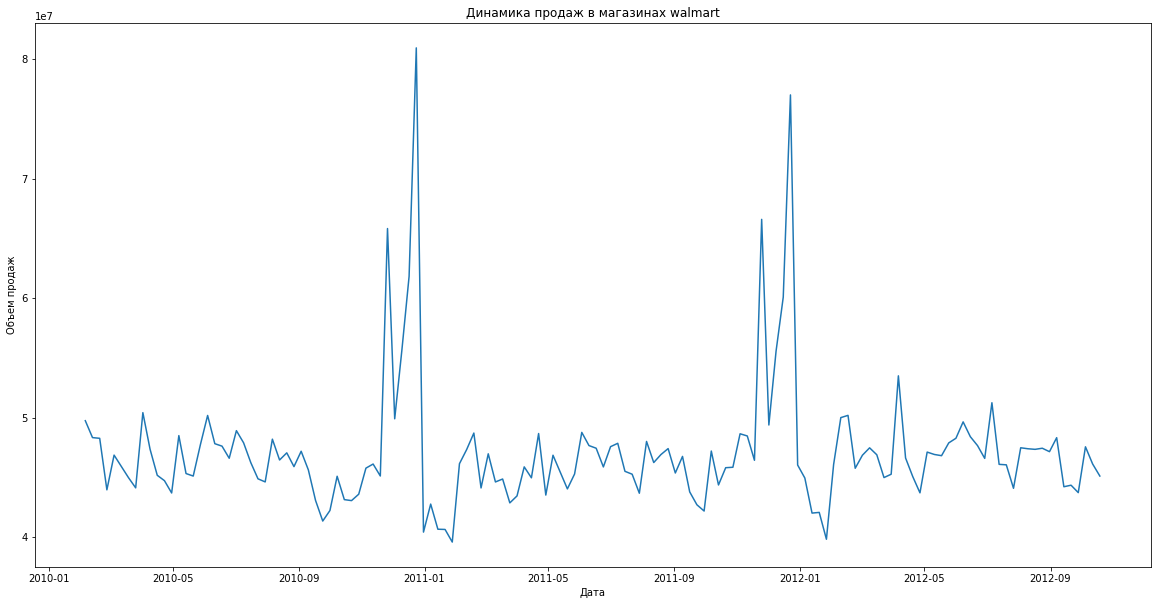

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data_copy['Date'], data_copy['Weekly_Sales'])
plt.title('Динамика продаж в магазинах walmart')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.show()

In [27]:
data

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


Матрица корреляции

In [28]:
data_copy = data.drop(['IsHoliday', 'Date', 'Type',], axis = 1, inplace = False)
correlation_matrix = data_copy.corr()
correlation_matrix 

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.024170,-0.085175,-0.182654,-0.049933,0.064666,-0.211129,0.208524
Dept,0.024170,1.000000,0.148345,-0.003026,0.004509,0.003417,-0.007544,0.007992
Weekly_Sales,-0.085175,0.148345,1.000000,0.243733,-0.002197,0.000385,-0.020791,-0.026114
Size,-0.182654,-0.003026,0.243733,1.000000,-0.057979,0.003803,-0.003249,-0.068803
Temperature,-0.049933,0.004509,-0.002197,-0.057979,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.064666,0.003417,0.000385,0.003803,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.211129,-0.007544,-0.020791,-0.003249,0.181292,-0.163226,1.000000,-0.299723
Unemployment,0.208524,0.007992,-0.026114,-0.068803,0.097301,-0.032461,-0.299723,1.000000


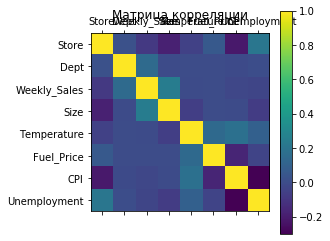

In [29]:
plt.matshow(correlation_matrix)
plt.title('Матрица корреляции')
plt.colorbar()
plt.xticks(np.arange(8), ['Store','Dept','Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment'])
plt.yticks(np.arange(8), ['Store','Dept','Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment'])
plt.show()

Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.

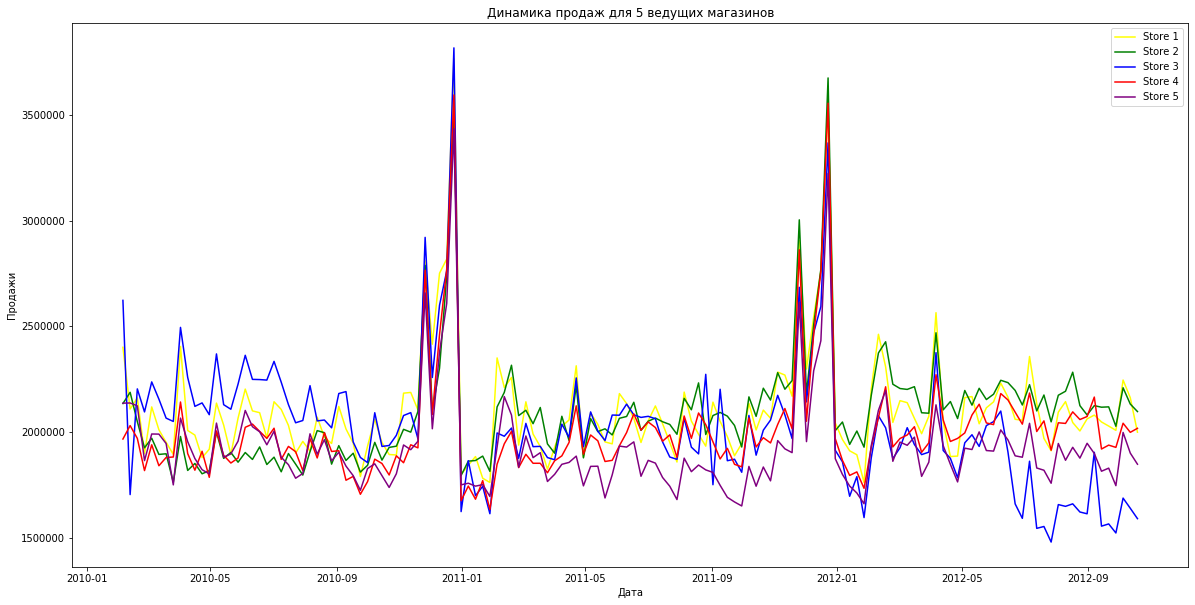

In [30]:
data_copy = pd.concat([data['Store'], data['Weekly_Sales'], data['Date']], axis = 1)
data_copy
data_grouped = data_copy.groupby('Store').sum()
data_grouped.sort_values(by = 'Weekly_Sales', ascending = False, inplace = True)
data_grouped = data_grouped.reset_index()
store_id = data_grouped['Store'].head(5).tolist()

stores1 = data.loc[(data['Store'] == store_id[0])]
stores2 = data.loc[(data['Store'] == store_id[1])]
stores3 = data.loc[(data['Store'] == store_id[2])]
stores4 = data.loc[(data['Store'] == store_id[3])]
stores5 = data.loc[(data['Store'] == store_id[4])]

stores1 = stores1.groupby('Date').sum().reset_index()
stores2 = stores2.groupby('Date').sum().reset_index()
stores3 = stores3.groupby('Date').sum().reset_index()
stores4 = stores4.groupby('Date').sum().reset_index()
stores5 = stores5.groupby('Date').sum().reset_index()

plt.figure(figsize=(20,10))
plt.plot(stores1['Date'], stores1['Weekly_Sales'], color = 'yellow', label = 'Store 1')
plt.plot(stores2['Date'], stores2['Weekly_Sales'], color = 'green', label = 'Store 2')
plt.plot(stores3['Date'], stores3['Weekly_Sales'], color = 'blue', label = 'Store 3')
plt.plot(stores4['Date'], stores4['Weekly_Sales'], color = 'red', label = 'Store 4')
plt.plot(stores5['Date'], stores5['Weekly_Sales'], color = 'purple', label = 'Store 5')

plt.title('Динамика продаж для 5 ведущих магазинов')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()


Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

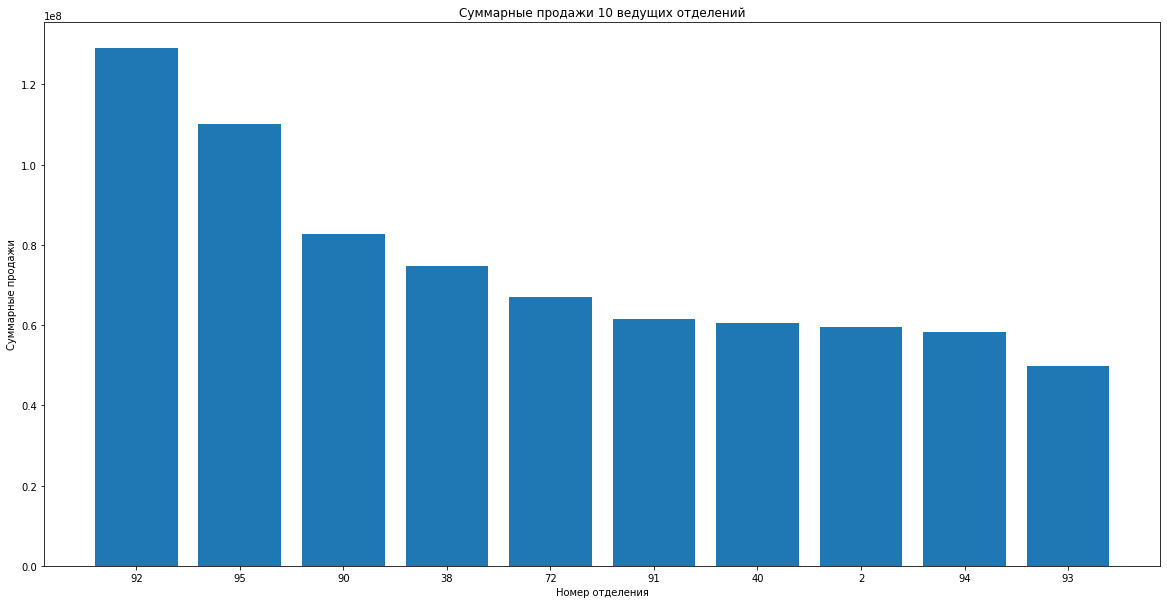

In [31]:
data_copy = data.loc[(data['Type'] == 'A') & (data['Date'] >= '2011-01-01') & (data['Date'] < '2012-01-01')]

data_grouped = data_copy.groupby('Dept').sum()
data_grouped.sort_values(by = 'Weekly_Sales', ascending = False, inplace = True)
data_grouped = data_grouped.reset_index()
dept_id = list(map(str, data_grouped['Dept'].head(10).tolist()))
dept_weekly_sum = data_grouped['Weekly_Sales'].head(10).tolist()

plt.figure(figsize=(20,10))
plt.bar(dept_id, dept_weekly_sum)
plt.title('Суммарные продажи 10 ведущих отделений')
plt.xlabel('Номер отделения')
plt.ylabel('Суммарные продажи')
plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [32]:
import json

def dataframe_from_members_of_the_group():
    results = []
    group_id = 25205856
    access_token = ''
    params = {
        'group_id': 25205856,
        'fields' : 'bdate',
        'offset' : 0,
        'access_token' : access_token,
        'v' : 5.9
    }
    response = rq.get('https://api.vk.com/method/groups.getMembers', params = params).json()
    amount = response['response']['count']
    data = pd.DataFrame(response['response']['items'])
    params['offset'] += 1000
    for i in range(amount // 1000):
        response = rq.get('https://api.vk.com/method/groups.getMembers', params = params).json()
        params['offset'] += 1000
        data = data.append(response['response']['items'])
    return data

In [33]:
data = dataframe_from_members_of_the_group()
data = data.reset_index()
data

,index,id,first_name,last_name,bdate,deactivated
0,0,19,Svetochek,Alenky,12.12,NaN
1,1,341,Shmavon,Gazanchyan,NaN,NaN
2,2,404,Eduard,Nikolaev,NaN,NaN
3,3,422,Dmitry,Sokolov,NaN,NaN
4,4,429,Mikhail,Zubkov,NaN,NaN
...,...,...,...,...,...,...
80477,477,596155685,Yelizavetochka,Saharchuk,NaN,banned
80478,478,596255579,Alyona,Litvinova,10.3.1990,NaN
80479,479,596274946,Galina,Yakovaleva,3.7,NaN
80480,480,596339225,Cherry,Morningstar,28.10.2001,NaN


In [34]:
data['deactivated'].value_counts(dropna = False)

NaN        72160
deleted     6557
banned      1765
Name: deactivated, dtype: int64

In [35]:
data.drop(data.loc[(data['deactivated'] == 'deleted') | (data['deactivated'] == 'banned')| (data['bdate'].isnull())].index, inplace = True)
data

,index,id,first_name,last_name,bdate,deactivated
0,0,19,Svetochek,Alenky,12.12,NaN
5,5,441,Evgenia,Nigmatullina,26.12.1988,NaN
6,6,905,Alina,Yashina,28.6,NaN
7,7,1010,Valery,Sopin,16.5.1991,NaN
8,8,1034,Denis,Derkach,29.9.1983,NaN
...,...,...,...,...,...,...
80476,476,596118838,Nastya,Gvanca,28.5,NaN
80478,478,596255579,Alyona,Litvinova,10.3.1990,NaN
80479,479,596274946,Galina,Yakovaleva,3.7,NaN
80480,480,596339225,Cherry,Morningstar,28.10.2001,NaN


In [36]:
data['bdate'].isnull().value_counts()

False    55757
Name: bdate, dtype: int64

In [37]:
def parse_date(date):
    splited = date.split('.')
    if (len(splited) > 2):
        return splited[0] + '.' + splited[1]
    return date


data['bdate'] = data['bdate'].apply(parse_date)
data_copy = data.copy()
data

,index,id,first_name,last_name,bdate,deactivated
0,0,19,Svetochek,Alenky,12.12,NaN
5,5,441,Evgenia,Nigmatullina,26.12,NaN
6,6,905,Alina,Yashina,28.6,NaN
7,7,1010,Valery,Sopin,16.5,NaN
8,8,1034,Denis,Derkach,29.9,NaN
...,...,...,...,...,...,...
80476,476,596118838,Nastya,Gvanca,28.5,NaN
80478,478,596255579,Alyona,Litvinova,10.3,NaN
80479,479,596274946,Galina,Yakovaleva,3.7,NaN
80480,480,596339225,Cherry,Morningstar,28.10,NaN


In [38]:
def compare_dates_50_members(dates):
    for i in range(0, len(dates), 50):
        yield check_arr(i, i + 50, dates), i // 50

def check_arr(a, b, dates):
    if b > len(dates):
        return -1
    for i in range(a, b - 1, 1):
        for j in range(i + 1, b, 1):
            if dates[i] == dates[j]:
                return 1
    return 0
        
compare = compare_dates_50_members(data['bdate'].tolist())
count = 0
for result, i in compare:
    print('Подгруппа', i + 1,': ', end ='')
    if result != - 1:
        if result == 1:
            print('Найдены два человека с одинковым днем рождения')
            count += 1
        else:
            print('В данной группе нет двух человек с одинаковым днем рождения')
    else:
        print('В данной группе меньше 50 человек')

Подгруппа 1 : Найдены два человека с одинковым днем рождения
Подгруппа 2 : Найдены два человека с одинковым днем рождения
Подгруппа 3 : Найдены два человека с одинковым днем рождения
Подгруппа 4 : Найдены два человека с одинковым днем рождения
Подгруппа 5 : Найдены два человека с одинковым днем рождения
Подгруппа 6 : Найдены два человека с одинковым днем рождения
Подгруппа 7 : Найдены два человека с одинковым днем рождения
Подгруппа 8 : Найдены два человека с одинковым днем рождения
Подгруппа 9 : Найдены два человека с одинковым днем рождения
Подгруппа 10 : Найдены два человека с одинковым днем рождения
Подгруппа 11 : Найдены два человека с одинковым днем рождения
Подгруппа 12 : Найдены два человека с одинковым днем рождения
Подгруппа 13 : Найдены два человека с одинковым днем рождения
Подгруппа 14 : Найдены два человека с одинковым днем рождения
Подгруппа 15 : Найдены два человека с одинковым днем рождения
Подгруппа 16 : Найдены два человека с одинковым днем рождения
Подгруппа 17 : На

Подгруппа 666 : Найдены два человека с одинковым днем рождения
Подгруппа 667 : Найдены два человека с одинковым днем рождения
Подгруппа 668 : В данной группе нет двух человек с одинаковым днем рождения
Подгруппа 669 : Найдены два человека с одинковым днем рождения
Подгруппа 670 : Найдены два человека с одинковым днем рождения
Подгруппа 671 : Найдены два человека с одинковым днем рождения
Подгруппа 672 : Найдены два человека с одинковым днем рождения
Подгруппа 673 : Найдены два человека с одинковым днем рождения
Подгруппа 674 : Найдены два человека с одинковым днем рождения
Подгруппа 675 : Найдены два человека с одинковым днем рождения
Подгруппа 676 : Найдены два человека с одинковым днем рождения
Подгруппа 677 : Найдены два человека с одинковым днем рождения
Подгруппа 678 : Найдены два человека с одинковым днем рождения
Подгруппа 679 : В данной группе нет двух человек с одинаковым днем рождения
Подгруппа 680 : Найдены два человека с одинковым днем рождения
Подгруппа 681 : Найдены два ч

In [39]:
def get_month(date):
    return int(date.split('.')[1])

data_copy['bmonth'] = data_copy['bdate'].apply(get_month)
data_copy

,index,id,first_name,last_name,bdate,deactivated,bmonth
0,0,19,Svetochek,Alenky,12.12,NaN,12
5,5,441,Evgenia,Nigmatullina,26.12,NaN,12
6,6,905,Alina,Yashina,28.6,NaN,6
7,7,1010,Valery,Sopin,16.5,NaN,5
8,8,1034,Denis,Derkach,29.9,NaN,9
...,...,...,...,...,...,...,...
80476,476,596118838,Nastya,Gvanca,28.5,NaN,5
80478,478,596255579,Alyona,Litvinova,10.3,NaN,3
80479,479,596274946,Galina,Yakovaleva,3.7,NaN,7
80480,480,596339225,Cherry,Morningstar,28.10,NaN,10


In [40]:
data_copy['bmonth'].value_counts().reset_index()

,index,bmonth
0,7,4976
1,6,4967
2,5,4878
3,1,4868
4,4,4798
5,3,4795
6,8,4695
7,10,4461
8,12,4457
9,9,4412


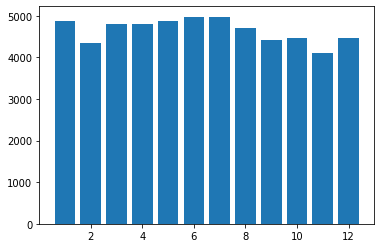

In [41]:
a = data_copy['bmonth'].value_counts().reset_index()
fig, ax = plt.subplots()
ax.bar(a['index'], a['bmonth'])
plt.show()

Правда ли, что рождаемость людей в течение года распределена равномерно?
Насколько мы видим из гистограммы, да

Вероятность

In [43]:
str(count / (len(data) // 50) * 100) + ' %'

'97.21973094170404 %'